In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dataset
df=pd.read_csv("data_project.csv",sep=";",encoding = "ISO-8859-1")
df.head()

,SAP_Code,Project_Name,Country,RD,Total_Cost_m.ua,bank_contrib_m_ua,Country_type,Sector,PCR_Year,peoples
0,P-CV-DA0-002,CONSTRUCTION D'1 NOUVEL AEROPORT A PRAIA,Cape Verde,RDGW,28.456,6.544000,ADB,Transport,2006,114985
1,P-CV-DB0-002,PROJET ROUTIER,Cape Verde,RDGW,3.890,3.241311,ADB,Transport,2007,87490
2,P-Z1-F00-013,NGA/TGO/BEN.POWER SYST.INTERC.PROJ.,Multinational,RDGW,35.020,11.027217,ADF,Power,2008,968266
3,P-CV-IAH-001,Projet dAppui Institutionnel au Secteur de l...,Cape Verde,RDGW,1.050,0.985109,ADB,Education,2010,3694
4,P-Z1-DB0-010,Aménagement de la Route Kankan - Kouremale - B...,Multinational,RDGW,101.580,24.000000,ADF,Transport,2010,266982


In [3]:
# Transform categorials features into dummies variables
df_dummy=pd.concat ([pd.get_dummies(df[['RD','Country_type','Sector']]),df[['bank_contrib_m_ua','peoples']]],axis=1)
df_dummy.head()

,RD_RDGC,RD_RDGE,RD_RDGN,RD_RDGS,RD_RDGW,Country_type_ADB,Country_type_ADF,Sector_Agriculture,Sector_Education,Sector_Health,Sector_Microfinance,Sector_Power,Sector_Transport,Sector_Water Sup/Sanit,bank_contrib_m_ua,peoples
0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,6.544000,114985
1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,3.241311,87490
2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,11.027217,968266
3,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0.985109,3694
4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,24.000000,266982


In [4]:
# Split intial datasets into train (80%), validation (10%) and test (10%) datasets
train_dataset = df_dummy.sample(frac=0.8,random_state=0)
test_val_dataset = df_dummy.drop(train_dataset.index)

val_dataset=test_val_dataset.sample(frac=0.5,random_state=0)
test_dataset=test_val_dataset.drop(val_dataset.index)

In [5]:
# Visualise datasets shape
print("Training dataset size = ",train_dataset.shape[0])
print("Validation dataset size = ",val_dataset.shape[0])
print("Test dataset size = ",test_dataset.shape[0])

Training dataset size =  383
Validation dataset size =  48
Test dataset size =  48


In [8]:
train_dataset.shape

(383, 16)

In [21]:
from keras import optimizers
#Neural Network model
def build_model():
    #
    model = Sequential()
    #The Input Layer
    model.add(Dense(128, kernel_initializer='normal',input_dim = train_dataset.shape[1]-1, activation='relu'))
    #The Hidden Layers
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    #The Output Layer
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    #define the optimizer
    sgd = optimizers.SGD(lr=0.001)
    #Compile the network
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    
    return model

In [22]:
# Load model
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               2048      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 166,913
Trainable params: 166,913
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Define input features and target feature

X_train=train_dataset.drop(['peoples'],axis=1)
Y_train=train_dataset[['peoples']]

X_val=val_dataset.drop(['peoples'],axis=1)
Y_val=val_dataset[['peoples']]

X_test=test_dataset.drop(['peoples'],axis=1)
Y_test=test_dataset[['peoples']]

In [25]:
# The patience parameter is the amount of epochs to check for improvement
checkpointer = ModelCheckpoint(filepath='training.hdf5',
                                               verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='mean_absolute_error', min_delta=0.0001,
                           verbose=1, mode='auto',patience=10)

history= model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=1000,verbose=0,batch_size=30,
                   callbacks=[early_stop,checkpointer])


Epoch 00001: val_loss improved from inf to 974103.82812, saving model to training.hdf5

Epoch 00002: val_loss improved from 974103.82812 to 973886.93750, saving model to training.hdf5

Epoch 00003: val_loss improved from 973886.93750 to 972310.39062, saving model to training.hdf5

Epoch 00004: val_loss improved from 972310.39062 to 965066.53906, saving model to training.hdf5

Epoch 00005: val_loss improved from 965066.53906 to 943854.06250, saving model to training.hdf5

Epoch 00006: val_loss improved from 943854.06250 to 907882.95312, saving model to training.hdf5

Epoch 00007: val_loss improved from 907882.95312 to 869132.26562, saving model to training.hdf5

Epoch 00008: val_loss improved from 869132.26562 to 865604.14062, saving model to training.hdf5

Epoch 00009: val_loss did not improve from 865604.14062

Epoch 00010: val_loss improved from 865604.14062 to 864591.96094, saving model to training.hdf5

Epoch 00011: val_loss did not improve from 864591.96094

Epoch 00012: val_loss


Epoch 00110: val_loss did not improve from 787561.46094

Epoch 00111: val_loss did not improve from 787561.46094

Epoch 00112: val_loss did not improve from 787561.46094

Epoch 00113: val_loss did not improve from 787561.46094

Epoch 00114: val_loss did not improve from 787561.46094

Epoch 00115: val_loss did not improve from 787561.46094

Epoch 00116: val_loss did not improve from 787561.46094

Epoch 00117: val_loss did not improve from 787561.46094

Epoch 00118: val_loss did not improve from 787561.46094

Epoch 00119: val_loss did not improve from 787561.46094

Epoch 00120: val_loss did not improve from 787561.46094

Epoch 00121: val_loss did not improve from 787561.46094

Epoch 00122: val_loss did not improve from 787561.46094

Epoch 00123: val_loss did not improve from 787561.46094

Epoch 00124: val_loss did not improve from 787561.46094

Epoch 00125: val_loss did not improve from 787561.46094

Epoch 00126: val_loss did not improve from 787561.46094

Epoch 00127: val_loss did not 

In [26]:
# put in dataframe historical stats by epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
232,799047.281250,799047.281250,723847.968832,723847.968832,232
233,808151.257812,808151.257812,725464.406250,725464.406250,233
234,799887.703125,799887.703125,724622.628835,724622.628835,234
235,802357.906250,802357.906250,724094.628264,724094.628264,235
236,794534.843750,794534.843750,723455.442151,723455.442151,236


In [27]:
# Function to Valisualise training and validation stats by epoch
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Beneficiaries]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
    plt.legend()

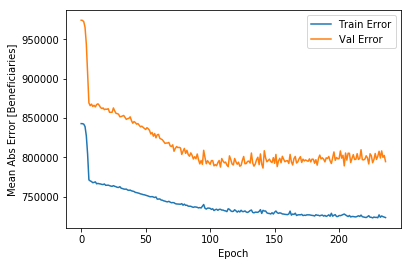

In [28]:
plot_history(history)

In [29]:
#Predict using test dataset
test_predictions = model.predict(X_test).flatten()

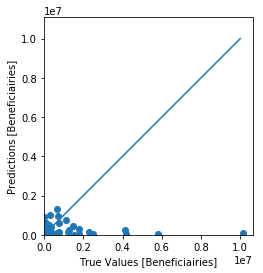

In [30]:
# Visualise the predicted numbers and real numbers
plt.scatter(Y_val, test_predictions)
plt.xlabel('True Values [Beneficiairies]')
plt.ylabel('Predictions [Beneficiairies]')
plt.axis('auto')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 1e7], [-100,  1e7])

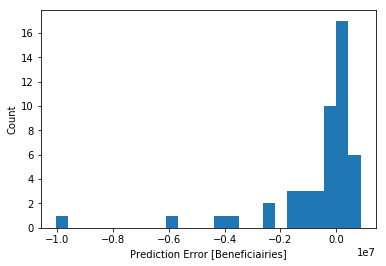

In [31]:
# Visualise errors
error = test_predictions-Y_val['peoples'].tolist()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Beneficiairies]")
_ = plt.ylabel("Count")

In [37]:
test_predictions.shape

(48,)

In [33]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [34]:
#load model
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_n = model_from_json(loaded_model_json)
# load weights into new model
model_n.load_weights("training.hdf5")

In [35]:
test_predictions_n = model_n.predict(X_test).flatten()
test_predictions_n

array([  29438.709 ,  904766.1   ,  549507.44  ,  409597.8   ,
        458728.66  , 1126120.2   ,   75495.55  ,  290526.4   ,
        243820.62  ,   30309.607 ,   64017.117 ,   22492.045 ,
        709166.5   ,   85436.22  ,   67906.94  ,   79604.89  ,
        862377.4   ,  399147.8   ,  177387.69  ,  402463.25  ,
         67905.04  ,  138501.12  ,  157650.98  ,   34694.312 ,
        391475.5   ,  311213.97  ,  440377.28  ,  660016.6   ,
        194311.25  ,  201700.92  ,    3589.4216,  116361.984 ,
        164062.27  ,  255710.23  ,  693793.5   ,  148356.83  ,
        801710.06  ,  362110.9   ,  587514.44  ,    6923.364 ,
        368871.2   ,  488071.06  ,   55117.19  ,   21441.498 ,
        483536.38  ,   34500.24  ,   40086.254 ,  279660.25  ],
      dtype=float32)

In [36]:
import pickle
pickle.dump(X_test, open('X_test.p','wb'))